In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

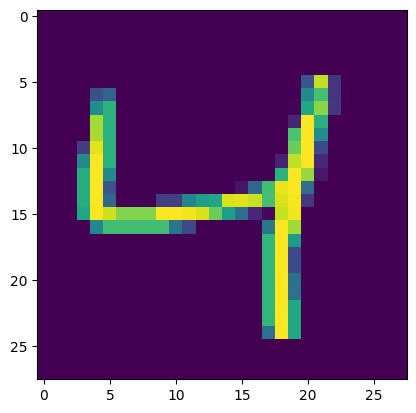

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train, X_test = X_train/255, X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))#convert into 1d array (1,784)
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) #for multiclassification


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 15s 6ms/step - loss: 0.2794 - accuracy: 0.9175 - val_loss: 0.1596 - val_accuracy: 0.9523
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1163 - accuracy: 0.9646 - val_loss: 0.1130 - val_accuracy: 0.9654
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0786 - accuracy: 0.9756 - val_loss: 0.0905 - val_accuracy: 0.9731
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.1102 - val_accuracy: 0.9678
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0994 - val_accuracy: 0.9703
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0375 - accuracy: 0.9878 - val_loss: 0.1102 - val_accuracy: 0.9705
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.1110 - val_accuracy

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9758

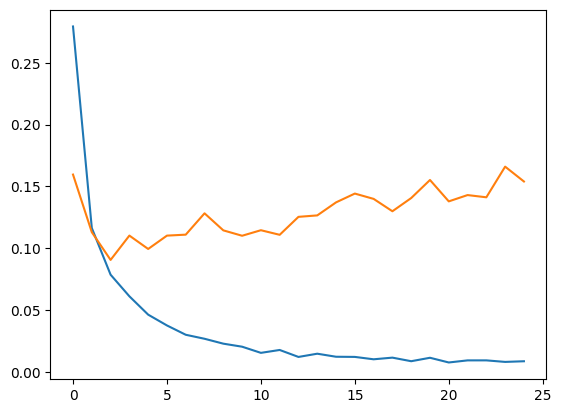

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

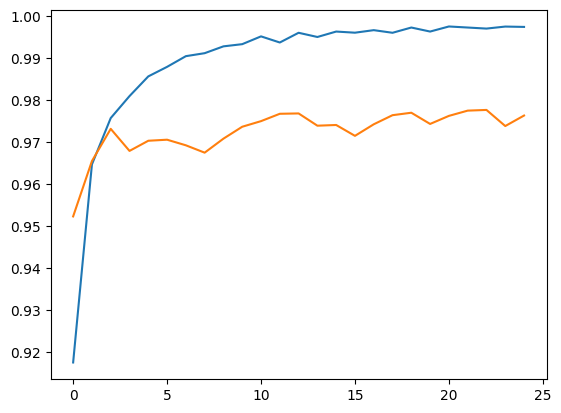

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

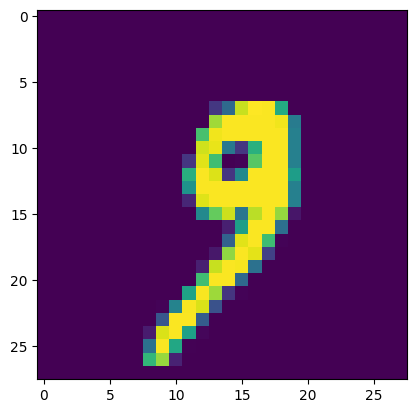

In [ ]:
plt.imshow(X_test[1000])

In [ ]:
model.predict(X_test[1000].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 28ms/step


array([9])